## 평균 이동

평균 이동(Mean Shift)는 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행. K-평균이 중심에 소속된 데이터의 **평균 거리** 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 **밀도가 가장 높은** 곳으로 이동.

평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾고 이를 위해 확률 밀도 함수(probability density function)를 이용. 

가장 집중적으로 데이터가 모여있어 **확률 밀도 함수가 피크인 점**을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용

1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반의 Mean Shift 알고리즘으로 계산
2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
3. 모든 데이터를 1~2까지 수행하면서 데이터를 이동. 개별 데이터들이 군집중심점으로 모임.
4. 지정된 반복(Iteration) 횟수만큼 전체 데이터에 대해서 KDE 기반으로 데이터를 이동시키면서 군집화 수행 
5. 개별 데이터들이 모인 중심점을 군집 중심점으로 설정

KDE(Kernel Density Estimation)는 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정 하는 대표적인 방법. 

관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정. 대표적인 커널 함수로서 가우시안 분포 함수 사용됨.

KDE는 다음과 같은 커널 함수식으로 표현됨. K는 커널 함수, x는 확률 변수 값, xi는 관측값, h는 대역폭(bandwidth) 

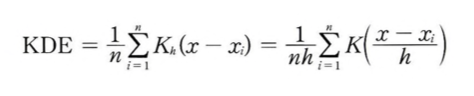

대역폭은 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용되며, 이 h 를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우.

h 가 작을수록 뾰족한 KDE를 가지게 되며(이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉬움), h 가 클수록 평활화된 KDE를 가지게 됨. (지나치게 단순화된 방식으로 확률 밀 도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉬움).

일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지 며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐. 또한 평균 이동 군집화는 군집의 개수를 지 정하지 않으며, 오직 **대역폭의 크기에 따라 군집화를 수행**

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)
meanshift = MeanShift(bandwidth = 0.8) ## bandwidth 값을 작게 할수록 군집 개수가 많아짐
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [4]:
meanshift = MeanShift(bandwidth = 1) ## bandwidth 값을 살짝 크게함.
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [6]:
# 사이킷런은 최적화된 bandwidth 값을 찾기 위해서 estimate_bandwidth( ) 함수를 제공

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X) ## 피처 데이터 세트를 입력

print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [7]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns=['ftr1','ftr2']) 
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)
meanshift = MeanShift(bandwidth = best_bandwidth) 
cluster_labels = meanshift.fit_predict(X)
print( 'cluster labels 유형 :' ,np.unique(cluster_labels))

cluster labels 유형 : [0 1 2]


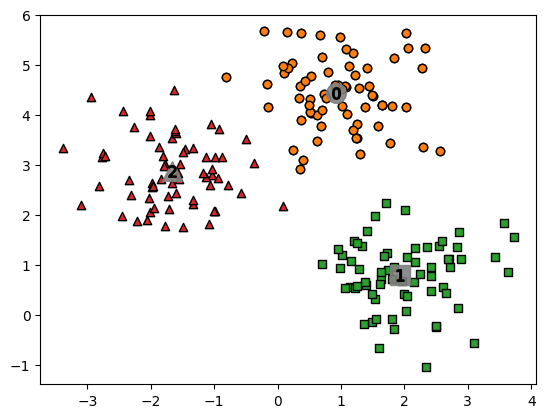

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels) 
markers=['o', 's', '^', 'x', '*']
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label) 
plt.show()

In [14]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


## GMM(Gaussian Mixture Model)

GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistri bution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식.

정규분포(Normal distribution)로도 알려진 가우시안 분포는 좌우 대칭형의 종(Bell) 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수.

GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주함. 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출(평균, 분산) + 데이터가 특정 정규 분포에 해당될 **확률** 구하기.

GMM에서의 모수 추정 - EM(Expectation and Maximization) 방법을 적용
* 개별정규 분포의 평균과 분산
* 각 데이터가 어떤 정규 분포에 해당되는지의 확률

### GMM을 이용한 붓꽃 데이터 세트 군집화

In [16]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환 
irisDF = pd.DataFrame(data = iris.data, columns = feature_names) 
irisDF['target'] = iris.target

In [17]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3, random_state = 0).fit(iris.data) ## n_components : gaussian mixture의 모델 총 개수 
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장 
irisDF ['gmm_cluster'] = gmm_cluster_labels 
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인. 
iris_result = irisDF.groupby(['target' ])['gmm_cluster'].value_counts() 
print(iris_result) ## 앞 절의 붓꽃 데이터 세트의 K-평균 군집화 결과보다 더 효과적인 분류 결과가 도출

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64


In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(iris.data) 
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: count, dtype: int64


/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### GMM와 K-평균의 비교

KMeans는 원형의 범위에서 군집화를 수행. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아짐. 

KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함. 

visualize_cluster_plot 함수
* clusterobj: 사이킷런의 군집 수행 객체. KMeans나 GaussianMixture의 fit( )와 predict( )로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력
* dataframe: 피처 데이터 세트와 label 값을 가진 DataFrame
* label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명, make_blobs( ) 결과 시각화일 경우는 dataframe 내의 target 칼럼명
* iscenter:사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [26]:
## visualize_cluster_plot 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()


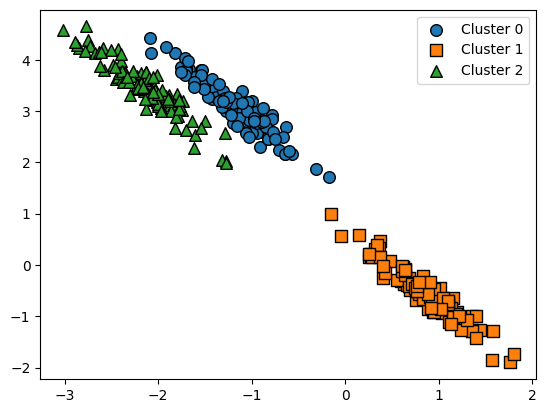

In [27]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs( )의 y 결괏값을 DataFrame으로 저장 
clusterDF = pd.DataFrame(data = X_aniso, columns=['ftr1','ftr2']) 
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False) ##  KMeans의 군집화 정확성이 떨어짐 !

/Users/kileylee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/_k/vj01ydns1g7_x8fmtnd7yq8m0000gn/T/ipykernel_99587/1141056905.py:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


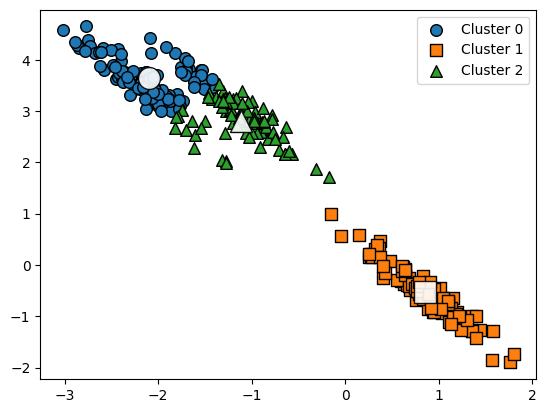

In [28]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용 kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso) 
clusterDF['kmeans_label'] = kmeans_label
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True) ## KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성 되지 않음

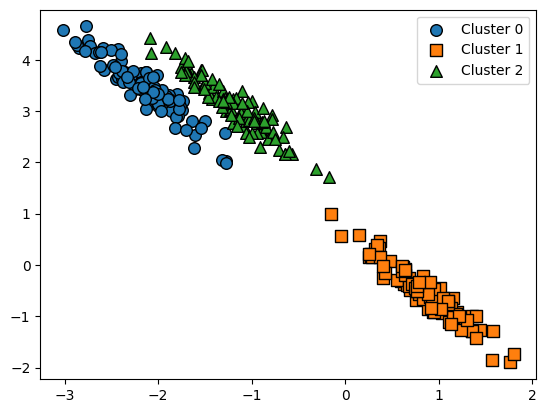

In [29]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용 
gmm = GaussianMixture(n_components=3, random_state=0) 
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']  = gmm_label
# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False) ## 데이터가 분포된 방향에 따라 정확하게 군집화됨.

In [32]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts()) ## 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target 값과 어긋나는 경우가 발생
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts()) ## GMM의 경우는 군집이 target 값과 잘 매핑됨.

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


이처럼 GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있음. 하지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다 !